# **Graded Challenge 4**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Graded Challenge : Graded Challenge 4

## **1.2 Query**

> Pada Graded Challenge ini data diperoleh dari Project ID `ftds-hacktiv8-project` Dataset Name `phase1_ftds_002_hck` dan Table Name `credit-card-information` dengan query sebagai berikut:

> SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.credit-card-information`
WHERE mod(CUST_ID, 2) = 0

## **1.3 Objective**

> Pada Graded Challenge ini akan dilakukan pembuatan model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank

# **2. Import Libraries** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture


import warnings
warnings.filterwarnings(action='ignore')

> Cell di atas merupakan daftar *library* yang digunakan dalam Graded Challenge ini

# **3. Data Loading** 

In [2]:
df = pd.read_csv('h8dsft_P1G4_Ropiudin.csv.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.582,0.125,200.000,0.000,200.000,0.000,0.125,0.000,0.125,0.000,0,2,1200.000,0.000,NaN,0.000,8
1,1902,943.584,0.875,103.000,103.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,215.325,410.485,0.000,8
2,2322,1.980,0.125,80.000,80.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,0.000,NaN,0.000,8
3,3426,461.456,1.000,585.000,585.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,258.033,151.696,0.000,8
4,3976,1053.595,1.000,1450.000,1450.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,397.091,227.143,0.000,8


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008,1.000,0.000,0.000,0.000,1259.572,0.000,0.000,0.000,0.545,9,0,1200.000,1379.635,271.364,0.091,11
4471,8614,809.583,0.909,0.000,0.000,0.000,3819.672,0.000,0.000,0.000,0.545,7,0,4150.000,4372.149,241.645,0.091,11
4472,4296,3386.491,1.000,560.980,427.220,133.760,2008.154,1.000,0.727,0.364,0.545,9,20,10100.000,1039.000,886.050,0.000,11
4473,4476,4840.546,1.000,1595.930,1595.930,0.000,4359.326,0.455,0.455,0.000,0.545,17,25,6000.000,905.845,2376.920,0.091,11
4474,3564,1977.007,1.000,1032.040,226.900,805.140,4335.919,0.909,0.091,0.818,0.545,21,17,4000.000,3056.425,910.708,0.091,11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

> Dataset yang digunakan pada Graded Challenge ini, berjumlah 4475 entri data atau baris dan 18 kolom, dan pada dataset tidak terdapat kolom yang bertipe object atau katakorik, tapi perlu ditinjau lagi apakah emang betul pada dataset semuanya data numerik apa ada data yang bertipe kategorik

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

> Pada dataset terdapat missing value pada kolom CREDIT_LIMIT dan kolom MINIMUM_PAYMENTS yaitu masing - masing sebanyak 1 dan 158 data

In [7]:
df[df.duplicated()].shape

(0, 18)

> Tidah terdapat data duplikat pada dataset

In [8]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4474.000,4475.000,4317.000,4475.000,4475.000
mean,4476.000,1565.744,0.878,1003.158,588.505,415.025,973.454,0.490,0.203,0.365,0.134,3.196,14.491,4494.020,1726.212,854.430,0.157,11.516
std,2583.931,2091.206,0.236,2210.813,1666.500,927.361,2133.465,0.400,0.299,0.397,0.199,6.500,24.156,3668.536,2961.259,2306.411,0.296,1.348
min,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,150.000,0.000,0.038,0.000,6.000
25%,2239.000,132.536,0.889,40.065,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,1.000,1500.000,390.206,169.814,0.000,12.000
50%,4476.000,874.905,1.000,362.480,29.990,89.450,0.000,0.500,0.083,0.167,0.000,0.000,7.000,3000.000,831.048,309.855,0.000,12.000
75%,6713.000,2058.519,1.000,1122.640,580.320,484.255,1098.570,0.917,0.333,0.750,0.182,4.000,17.000,6000.000,1895.959,830.395,0.167,12.000
max,8950.000,19043.139,1.000,49039.570,40761.250,22500.000,29282.109,1.000,1.000,1.000,1.167,110.000,358.000,30000.000,46930.598,61031.619,1.000,12.000


> Berdasarkan describe tidak terdapat anomali pada dataset

Berikut deskripsi disetiap kolom pada dataset berdasarkan sumber dari [kaggle](https://www.kaggle.com/code/rizkynindra/cc-clustering)

> **`CUST_ID`** : Identifikasi pemegang Kartu Kredit

> **`BALANCE`** : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian

> **`BALANCE_FREQUENCY`** : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)

> **`PURCHASES`** : Jumlah pembelian yang dilakukan dari akun

> **`ONEOFF_PURCHASES`** : Jumlah pembelian maksimum dilakukan dalam sekali jalan

> **`INSTALLMENT_SPURCHASES`** : Jumlah pembelian dilakukan secara cicilan

> **`CASH_ADVANCE`** : Uang muka diberikan oleh pengguna

> **`PURCHASES_FREQUENCY`** : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)

> **`ONEOFF_PURCHASES_FREQUENCY`** : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)

> **`PURCHASES_INSTALLMENTS_FREQUENCY`** : Seberapa sering pembelian dengan mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)

> **`CASH_ADVANCE_FREQUENCY`** :Seberapa sering uang muka dibayarkan

> **`CASH_ADVANCE_TRX`** : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"

> **`PURCHASES_TRX`**: Jumlah transaksi pembelian yang dilakukan

> **`CREDIT_LIMIT`** : Batas Kartu Kredit untuk pengguna

> **`PAYMENTS`** : Jumlah Pembayaran yang dilakukan oleh pengguna

> **`MINIMUM_PAYMENTS`** : Jumlah minimum pembayaran yang dilakukan oleh pengguna

> **`PRCFULL_PAYMENT`** : Persentase pembayaran penuh yang dibayarkan oleh pengguna

> **`TENURE`** : Jangka waktu layanan kartu kredit untuk pengguna

> Berdasarkan deskripsi diatas, dapat saya tentukan bahwa pada kolom TENURE merupakan kolom kategorik, dikarnakan pada kolom TENURE hanya terdapat 7 unik values. Sehingga dataset bisa dikelompokkan antara kolom numerik dan kolom kategorik

In [9]:
df_num =df.drop(columns=['TENURE'])
df_cat =df[['TENURE']]

In [10]:
# numeric overview
df_num.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4475.000,4474.000,4475.000,4317.000,4475.000
mean,4476.000,1565.744,0.878,1003.158,588.505,415.025,973.454,0.490,0.203,0.365,0.134,3.196,14.491,4494.020,1726.212,854.430,0.157
std,2583.931,2091.206,0.236,2210.813,1666.500,927.361,2133.465,0.400,0.299,0.397,0.199,6.500,24.156,3668.536,2961.259,2306.411,0.296
min,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,150.000,0.000,0.038,0.000
25%,2239.000,132.536,0.889,40.065,0.000,0.000,0.000,0.083,0.000,0.000,0.000,0.000,1.000,1500.000,390.206,169.814,0.000
50%,4476.000,874.905,1.000,362.480,29.990,89.450,0.000,0.500,0.083,0.167,0.000,0.000,7.000,3000.000,831.048,309.855,0.000
75%,6713.000,2058.519,1.000,1122.640,580.320,484.255,1098.570,0.917,0.333,0.750,0.182,4.000,17.000,6000.000,1895.959,830.395,0.167
max,8950.000,19043.139,1.000,49039.570,40761.250,22500.000,29282.109,1.000,1.000,1.000,1.167,110.000,358.000,30000.000,46930.598,61031.619,1.000


In [11]:
# categorical overview
for i in df_cat:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 20)

TENURE

12    3807
11     166
10     114
6      103
7      100
8       97
9       88
Name: TENURE, dtype: int64
--------------------


# **4. Data Cleaning** 

In [12]:
df_clean = df.copy()
df_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.582,0.125,200.000,0.000,200.000,0.000,0.125,0.000,0.125,0.000,0,2,1200.000,0.000,NaN,0.000,8
1,1902,943.584,0.875,103.000,103.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,215.325,410.485,0.000,8
2,2322,1.980,0.125,80.000,80.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,0.000,NaN,0.000,8
3,3426,461.456,1.000,585.000,585.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,258.033,151.696,0.000,8
4,3976,1053.595,1.000,1450.000,1450.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,397.091,227.143,0.000,8


In [13]:
df_clean = df_clean.drop(columns='CUST_ID')
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,16.582,0.125,200.000,0.000,200.000,0.000,0.125,0.000,0.125,0.000,0,2,1200.000,0.000,NaN,0.000,8
1,943.584,0.875,103.000,103.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,215.325,410.485,0.000,8
2,1.980,0.125,80.000,80.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,0.000,NaN,0.000,8
3,461.456,1.000,585.000,585.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,258.033,151.696,0.000,8
4,1053.595,1.000,1450.000,1450.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,397.091,227.143,0.000,8


> Dilakukan penghapusan kolom pada kolom CUST_ID, dikarnakan pada kolom CUST_ID hanya merupakan identifikasi pada pemegang kartu kredit

In [14]:
df_clean.isnull().mean().sum()

0.03553072625698324

> Pada dataset terdapat missing value sebesar 3.5% dan dikarnakan tidak terlalubanyak atau masih dibawah 5% maka dilakukan penghapusan terhadap missing value

In [15]:
df_clean.dropna(axis=0,inplace=True)

In [16]:
df_clean.isnull().mean().sum()

0.0

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 1 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4316 non-null   float64
 1   BALANCE_FREQUENCY                 4316 non-null   float64
 2   PURCHASES                         4316 non-null   float64
 3   ONEOFF_PURCHASES                  4316 non-null   float64
 4   INSTALLMENTS_PURCHASES            4316 non-null   float64
 5   CASH_ADVANCE                      4316 non-null   float64
 6   PURCHASES_FREQUENCY               4316 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4316 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4316 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4316 non-null   float64
 10  CASH_ADVANCE_TRX                  4316 non-null   int64  
 11  PURCHASES_TRX                     4316 non-null   int64  
 12  CREDIT

In [18]:
df_num =df_clean.drop(columns=['TENURE'])
df_cat =df_clean[['TENURE']]

# **5. Exploratory Data Analysis (EDA)** 

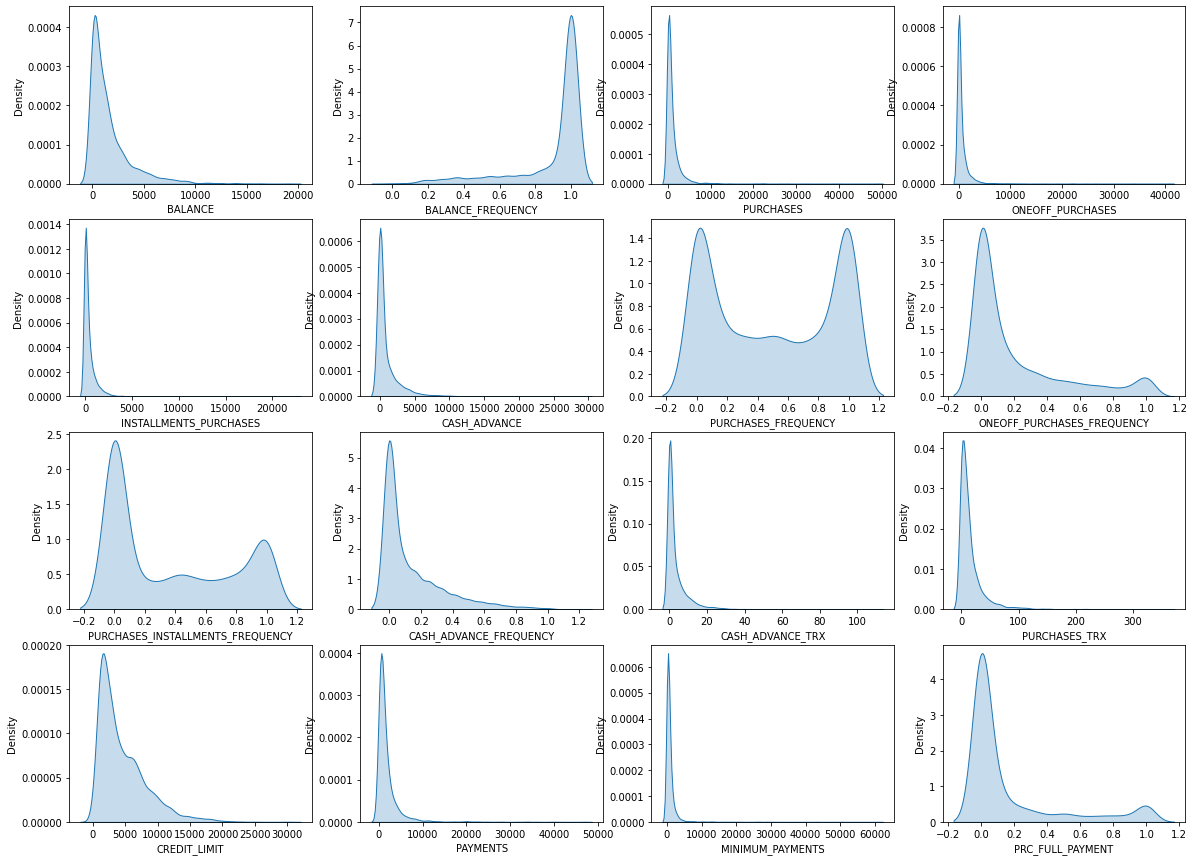

In [19]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(20,15))
i=0
j=0
for col in df_num.columns:
    sns.kdeplot(data=df_num, x=col, fill=True,ax=axes[i][j])
    j+=1
    if j>3:
        i+=1
        j=0
    if i==4:
        break

> Grafik diatas merupakan grafik pada kolom numerik, berdasarkan grafik diatas dapat diinterpretasikan sebagai berikut:
- Pada kolom numerik, rata - rata kolom memiliki grafik yang berdistribusi tidak normal atau skew, dan berdasarkan grafik berkemungkinan memiliki outlier pada kolom yang memiliki distribusi tidak normal atau skew
- Terdapat dua puncak pada kolom PURCHASES_FREQUENCY dan kolom PURCHASES_INSTALLMENTS_FREQUENCY
- Pada grafik diatas dimana setiap kolom yang memiliki distribusi tidak normal atau skew, memiliki density paling tinggi pada nilai 0, yang berarti pada kolom yang memiliki density tinggi pada nilai 0, memiliki nilai 0 yang banyak pada kolom tersebut

In [20]:
df_cat.value_counts().reset_index()

,TENURE,0
0,12,3684
1,11,162
2,10,110
3,6,95
4,7,93
5,8,89
6,9,83


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

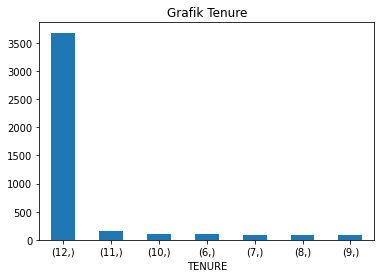

In [21]:
df_cat.value_counts().plot(kind='bar')
plt.title('Grafik Tenure')
plt.xticks(rotation = 0)

> Pada kolom tenure yang merupakan kolom kategorik, tenure 12 merupakan tenure trbanyak daripada yang lainnya, yang berarti Jangka waktu layanan kartu kredit untuk pengguna kebanyakan memilih tenure 12, yaitu sebanyak 3684 pengguna

In [22]:
df_inf = df_clean.sample(20,random_state=0)
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
673,1186.928,1.000,2178.000,1546.500,631.500,0.000,1.000,1.000,0.333,0.000,0,28,7000.000,2565.252,300.082,0.000,12
3191,360.671,1.000,3956.640,0.000,3956.640,148.682,1.000,0.000,1.000,0.083,1,12,4500.000,4013.483,3662.236,0.250,12
3285,3342.878,0.818,1368.700,1300.000,68.700,1594.328,0.083,0.083,0.083,0.083,2,2,7500.000,9614.698,1309.067,0.111,12
3512,2342.724,0.909,0.000,0.000,0.000,4697.170,0.000,0.000,0.000,0.333,7,0,8000.000,6049.990,517.091,0.091,12
3513,2910.425,1.000,0.000,0.000,0.000,2121.505,0.000,0.000,0.000,0.333,6,0,7500.000,3855.512,749.956,0.000,12
4458,1360.796,1.000,0.000,0.000,0.000,462.861,0.000,0.000,0.000,0.273,6,0,1500.000,303.032,443.781,0.000,11
532,916.488,1.000,633.710,316.820,316.890,0.000,1.000,0.417,0.750,0.000,0,20,4000.000,255.470,234.096,0.000,12
3732,4705.295,1.000,0.000,0.000,0.000,9894.067,0.000,0.000,0.000,0.917,30,0,9000.000,8778.878,1470.362,0.000,12
3734,4939.646,1.000,470.540,139.380,331.160,8753.243,0.750,0.333,0.583,0.917,39,14,10000.000,11721.866,1183.292,0.083,12
921,33.586,1.000,298.200,0.000,298.200,0.000,1.000,0.000,1.000,0.000,0,12,4000.000,299.549,171.520,1.000,12


In [23]:
df_clean = df_clean.drop(df_inf.index)
df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,943.584,0.875,103.000,103.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,215.325,410.485,0.000,8
3,461.456,1.000,585.000,585.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,258.033,151.696,0.000,8
4,1053.595,1.000,1450.000,1450.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,397.091,227.143,0.000,8
5,2237.238,1.000,120.000,120.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,2500.000,343.103,712.986,0.000,8
7,424.994,0.375,1200.000,1200.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1200.000,57.266,56.720,0.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008,1.000,0.000,0.000,0.000,1259.572,0.000,0.000,0.000,0.545,9,0,1200.000,1379.635,271.364,0.091,11
4471,809.583,0.909,0.000,0.000,0.000,3819.672,0.000,0.000,0.000,0.545,7,0,4150.000,4372.149,241.645,0.091,11
4472,3386.491,1.000,560.980,427.220,133.760,2008.154,1.000,0.727,0.364,0.545,9,20,10100.000,1039.000,886.050,0.000,11
4473,4840.546,1.000,1595.930,1595.930,0.000,4359.326,0.455,0.455,0.000,0.545,17,25,6000.000,905.845,2376.920,0.091,11


In [24]:
df_clean.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1186.928,1.000,2178.000,1546.500,631.500,0.000,1.000,1.000,0.333,0.000,0,28,7000.000,2565.252,300.082,0.000,12
1,360.671,1.000,3956.640,0.000,3956.640,148.682,1.000,0.000,1.000,0.083,1,12,4500.000,4013.483,3662.236,0.250,12
2,3342.878,0.818,1368.700,1300.000,68.700,1594.328,0.083,0.083,0.083,0.083,2,2,7500.000,9614.698,1309.067,0.111,12
3,2342.724,0.909,0.000,0.000,0.000,4697.170,0.000,0.000,0.000,0.333,7,0,8000.000,6049.990,517.091,0.091,12
4,2910.425,1.000,0.000,0.000,0.000,2121.505,0.000,0.000,0.000,0.333,6,0,7500.000,3855.512,749.956,0.000,12
5,1360.796,1.000,0.000,0.000,0.000,462.861,0.000,0.000,0.000,0.273,6,0,1500.000,303.032,443.781,0.000,11
6,916.488,1.000,633.710,316.820,316.890,0.000,1.000,0.417,0.750,0.000,0,20,4000.000,255.470,234.096,0.000,12
7,4705.295,1.000,0.000,0.000,0.000,9894.067,0.000,0.000,0.000,0.917,30,0,9000.000,8778.878,1470.362,0.000,12
8,4939.646,1.000,470.540,139.380,331.160,8753.243,0.750,0.333,0.583,0.917,39,14,10000.000,11721.866,1183.292,0.083,12
9,33.586,1.000,298.200,0.000,298.200,0.000,1.000,0.000,1.000,0.000,0,12,4000.000,299.549,171.520,1.000,12


> Code diatas merupakan code untuk memisahkan data inference dari dataset, data inference digunakan untuk melakukan predict pada model yang sudah didapatkan

In [25]:
df_num =df_clean.drop(columns=['TENURE'])
df_cat =df_clean[['TENURE']]

# **6. Data Preprocessing** 

### **Numerical Feature**

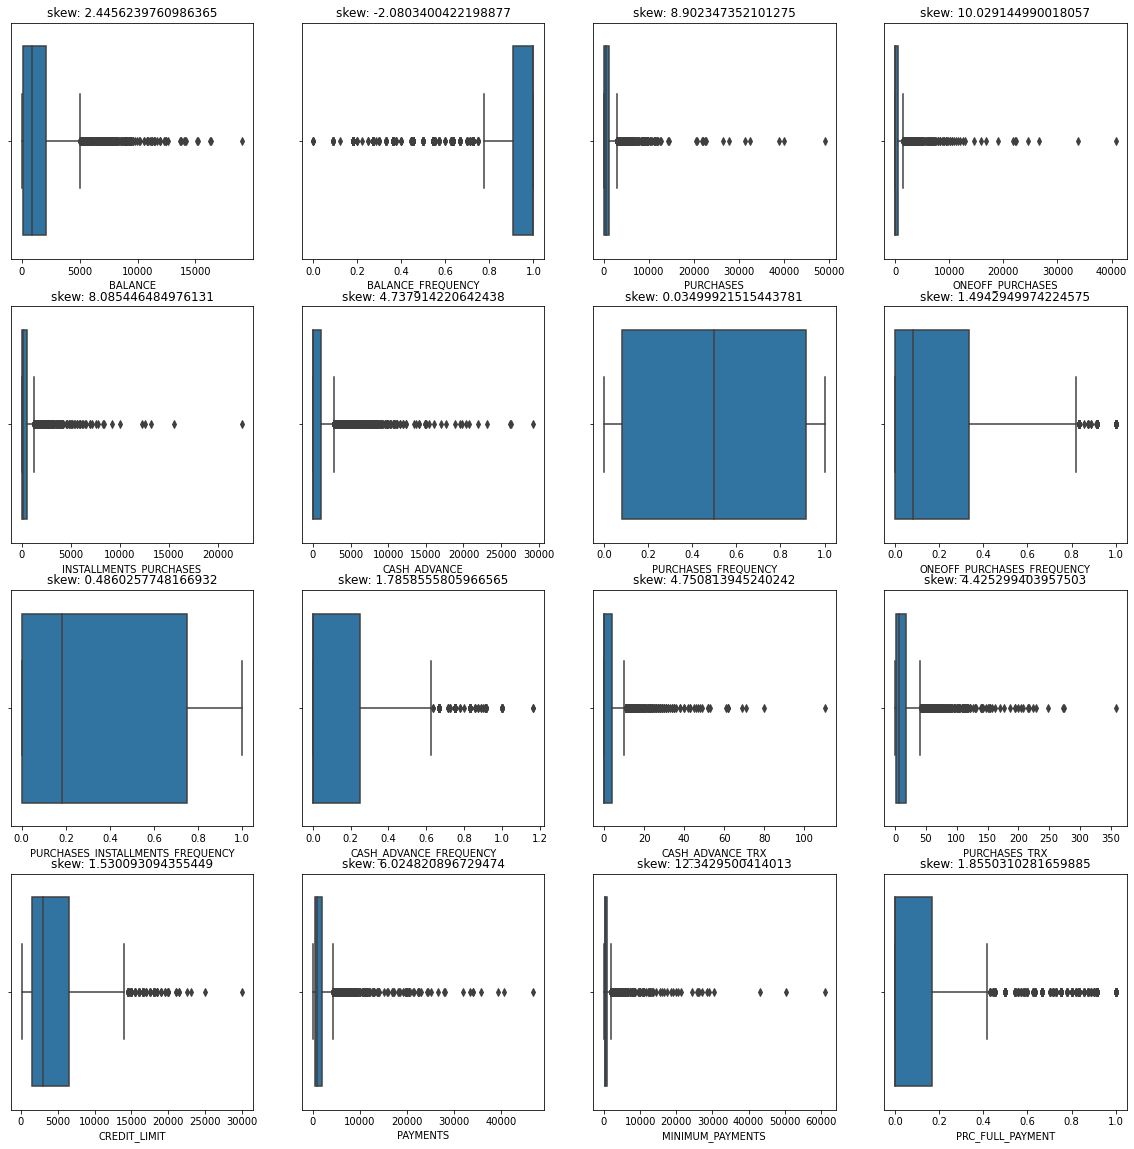

In [26]:
fig, ax = plt.subplots(ncols=4,nrows=4, figsize=[20,20])
ax = ax.flatten()

for idx, col in enumerate(df_num):
    sns.boxplot(df_num[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {df_num[col].skew()}')

plt.show()

In [27]:
def outlier_analysis(df_num,col):
  skewness = df_num[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_num[col].mean() + 3*df_num[col].std()
    lower = df_num[col].mean() - 3*df_num[col].std()
  else:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (3 * IQR)
    lower = Q1 - (3 * IQR)
    
  no_outliers = df_num[(df_num[col]>=lower) &  (df_num[col]<=upper)]
  outliers = df_num[(df_num[col]<lower) | (df_num[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_num,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_num))*100, '%') 
    print('-'*10)

BALANCE
count of outlier:  97
percentage of outlier:  2.2579143389199254 %
----------
BALANCE_FREQUENCY
count of outlier:  496
percentage of outlier:  11.54562383612663 %
----------
PURCHASES
count of outlier:  173
percentage of outlier:  4.027001862197393 %
----------
ONEOFF_PURCHASES
count of outlier:  257
percentage of outlier:  5.982309124767225 %
----------
INSTALLMENTS_PURCHASES
count of outlier:  172
percentage of outlier:  4.003724394785848 %
----------
CASH_ADVANCE
count of outlier:  236
percentage of outlier:  5.493482309124767 %
----------
PURCHASES_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
----------
ONEOFF_PURCHASES_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
----------
PURCHASES_INSTALLMENTS_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
----------
CASH_ADVANCE_FREQUENCY
count of outlier:  2
percentage of outlier:  0.04655493482309125 %
----------
CASH_ADVANCE_TRX
count of outlier:  176
percentage of outlier:  4.0968342644

> Berdasarkan hasil diatas diketahui bahwa hampir semua kolom numerik terdapat outlier, disini saya akan melakukan capping terhadapat kolom numerik yang memiliki outlier dibawah 1%, dikarnakan supaya tidak terlalu banyak kehilangan informasi pada dataset dan juga supaya tidak terjadi pada suatu kolom bernilai 0 semua, karna dilakukan capping pada kolom yang memiliki density tinggi pada nilai 0

In [28]:
df_num['CASH_ADVANCE_FREQUENCY'] = df_num['CASH_ADVANCE_FREQUENCY'].apply(lambda x: up if x>up else low if x<low else x)

In [29]:
df_num['CREDIT_LIMIT'] = df_num['CREDIT_LIMIT'].apply(lambda x: up if x>up else low if x<low else x)

> Kolom yang memiliki outlier dibawah 1% adalah kolom CASH_ADVANCE_FREQUENCY dan kolom CREDIT_LIMIT, sehingga pada kolom tersebut dilakukan capping untuk handling outlier

In [30]:
def outlier_analysis(df_num,col):
  skewness = df_num[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_num[col].mean() + 3*df_num[col].std()
    lower = df_num[col].mean() - 3*df_num[col].std()
  else:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (3 * IQR)
    lower = Q1 - (3 * IQR)
    
  no_outliers = df_num[(df_num[col]>=lower) &  (df_num[col]<=upper)]
  outliers = df_num[(df_num[col]<lower) | (df_num[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_num,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_num))*100, '%') 
    print('-'*10)

BALANCE
count of outlier:  97
percentage of outlier:  2.2579143389199254 %
----------
BALANCE_FREQUENCY
count of outlier:  496
percentage of outlier:  11.54562383612663 %
----------
PURCHASES
count of outlier:  173
percentage of outlier:  4.027001862197393 %
----------
ONEOFF_PURCHASES
count of outlier:  257
percentage of outlier:  5.982309124767225 %
----------
INSTALLMENTS_PURCHASES
count of outlier:  172
percentage of outlier:  4.003724394785848 %
----------
CASH_ADVANCE
count of outlier:  236
percentage of outlier:  5.493482309124767 %
----------
PURCHASES_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
----------
ONEOFF_PURCHASES_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
----------
PURCHASES_INSTALLMENTS_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
----------
CASH_ADVANCE_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
----------
CASH_ADVANCE_TRX
count of outlier:  176
percentage of outlier:  4.0968342644320295 %
-------

> Berdasarkan hasil diatas sudah tidak terdapat outlier pada kolom CASH_ADVANCE_FREQUENCY dan kolom CREDIT_LIMIT, yang berarti capping berhasil di terapkan 

In [31]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
  
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

vif_data

,feature,VIF
0,BALANCE,1.983
1,BALANCE_FREQUENCY,1.297
2,PURCHASES,52511.423
3,ONEOFF_PURCHASES,29879.923
4,INSTALLMENTS_PURCHASES,9193.382
5,CASH_ADVANCE,2.855
6,PURCHASES_FREQUENCY,10.525
7,ONEOFF_PURCHASES_FREQUENCY,3.772
8,PURCHASES_INSTALLMENTS_FREQUENCY,9.454
9,CASH_ADVANCE_FREQUENCY,3.249


> Berdasarkan hasil VIF, terdapat 10 kolom yang memiliki nilai VIF dibawah 5, yang berarti terdapat 10 kolom pada kolom numerik yang tidak saling berkaitan dengan feature lainnya. Sehingga dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi sampai 11 dimensi

In [32]:
df_num.shape

(4296, 16)

In [33]:
num_scaler = MinMaxScaler()
df_num_scaled = num_scaler.fit_transform(df_num)

In [34]:
pca = PCA(n_components=16).fit(df_num_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.51428781, 0.66875829, 0.80579549, 0.90181064, 0.94933138,
       0.96807752, 0.98056912, 0.98717559, 0.99213571, 0.99432036,
       0.99602799, 0.99768411, 0.99889073, 0.99999997, 1.        ,
       1.        ])

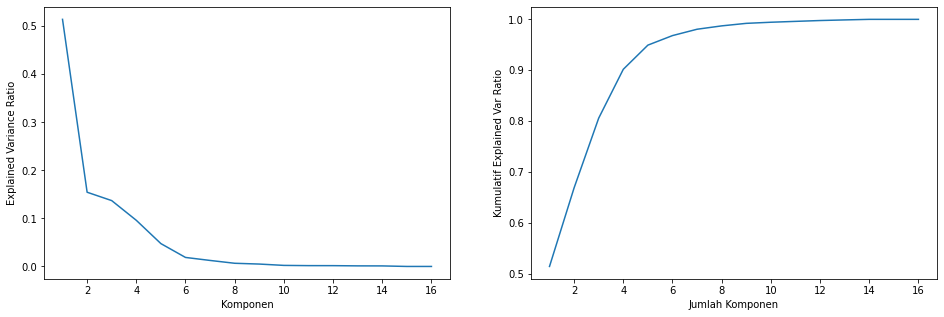

In [35]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,17),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,17),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

> Berdasarkan PCA terdapat patahan atau elbow di komponen 2 dan 6, dan dilihat dari nilai kumulatif EVR nya komponen 2 memiliki nilai komulativ EVR yang sangat kecil yaitu sekitar 60% sedangkan pada komponen 6 memiliki nilai komulativ EVR yang sangat besar yaitu sekitar 90% keatas

In [36]:
pca = PCA(n_components=0.95)
df_num_reduced = pca.fit_transform(df_num_scaled)

> Pada proses reduksi dimensi, saya menetapkan untuk mengambil komponen sebesar 95%, karna menurut saya 95% sudah mewakili keseluruhan kolom pada data numerik

In [37]:
pca.n_components_

6

> Dengan ditentukan komponen sebesar 95%, diperoleh 6 komponen atau pc, yang nantinya bakalan digunakan pada tahap pemodelan

In [38]:
np.sum(pca.explained_variance_ratio_)

0.9680775212931323

In [39]:
df_num_reduced = pd.DataFrame(df_num_reduced)
df_num_reduced

,0,1,2,3,4,5
0,-0.495,0.131,0.051,-0.283,-0.089,0.009
1,-0.485,0.088,0.056,-0.276,-0.202,-0.006
2,-0.485,0.081,0.058,-0.274,-0.202,0.020
3,-0.488,0.070,0.056,-0.270,-0.204,0.044
4,-0.528,0.328,0.040,-0.318,0.368,0.020
...,...,...,...,...,...,...
4291,-0.756,-0.250,-0.069,0.405,-0.027,-0.085
4292,-0.763,-0.219,-0.069,0.411,0.063,-0.056
4293,0.298,-0.684,0.426,0.319,0.229,-0.237
4294,-0.348,-0.473,0.354,0.401,0.088,-0.073


### **Categorical Feature**

In [40]:
df_cat

,TENURE
0,8
1,8
2,8
3,8
4,8
...,...
4291,11
4292,11
4293,11
4294,11


In [41]:
df_final = pd.concat([df_num_reduced,df_cat],axis=1)
df_final

,0,1,2,3,4,5,TENURE
0,-0.495,0.131,0.051,-0.283,-0.089,0.009,8
1,-0.485,0.088,0.056,-0.276,-0.202,-0.006,8
2,-0.485,0.081,0.058,-0.274,-0.202,0.020,8
3,-0.488,0.070,0.056,-0.270,-0.204,0.044,8
4,-0.528,0.328,0.040,-0.318,0.368,0.020,8
...,...,...,...,...,...,...,...
4291,-0.756,-0.250,-0.069,0.405,-0.027,-0.085,11
4292,-0.763,-0.219,-0.069,0.411,0.063,-0.056,11
4293,0.298,-0.684,0.426,0.319,0.229,-0.237,11
4294,-0.348,-0.473,0.354,0.401,0.088,-0.073,11


In [42]:
# PCA untuk visualisasi model
df_num_scaled = pd.DataFrame(df_num_scaled)
X2D = PCA(n_components=2).fit_transform(df_num_scaled)
X2D = pd.DataFrame(X2D)

> PCA untuk visualisasi model merupakan data train yang sudah discaler dan direduksi dimensi menjadi 2 dimensi, yang nantinya digunakan untuk visualisasi terhadap model - model yang digunakan

# **7. Modeling** 

## **7.1. Model Definition**

> Pada tahap model definition, model yang digunakan adalah sebagai berikut:

1. KMeans 
3. Gaussian Mixture
4. Bayesian Gaussian Mixture

> Dari model - model ini akan ditentukan nilai k terbaik dari setiap model, dan dibandingkan dari masing - masing model untuk digunakan di tahap model inference

### **KMeans Model 1**

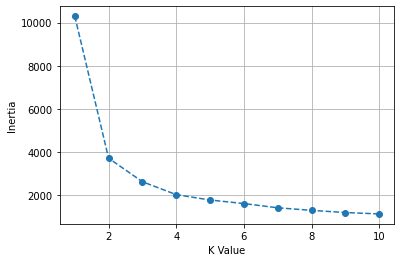

In [43]:
K = [1,2,3,4,5,6,7,8,9,10]
inertia_model_1=[KMeans(n_clusters=i,init='k-means++',n_init=15).fit(df_final).inertia_ for i in K]
plt.plot(K,inertia_model_1,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [44]:
inertia_model_1 

[10289.623316239944,
 3718.4968909607596,
 2630.7678303934317,
 2034.1509464091996,
 1785.2457621796004,
 1620.9281002011053,
 1425.0548644448834,
 1306.8292965715482,
 1205.528628773643,
 1141.8542731759026]

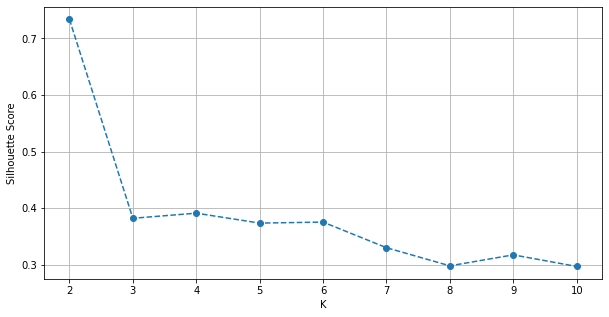

In [45]:
K = [2,3,4,5,6,7,8,9,10]
s_score_slc_model_1=[silhouette_score(df_final, KMeans(n_clusters=i,init='k-means++',n_init=15).fit(df_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc_model_1,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [46]:
s_score_slc_model_1

[0.7334995660819739,
 0.3822391939883008,
 0.3912800143984518,
 0.3737648170983115,
 0.3755004083794424,
 0.3302859474480739,
 0.2983121341118402,
 0.31766631115210325,
 0.29720752789898686]

> Berdasarkan pada **kmeans model 1**, diketahui bahwa pada grafik pertama terdapat patahan atau elbow di k value 2, 3 dan 4, untuk dapat menentukan nilai k mana yang diambil maka perlu dilihat silhouette score pada grafik ke dua

> Berdasarkan silhouette score, nilai k 2 memiliki silhouette score lebih besar dari pada silhouette score di k 3 dan 4, oleh karna itu pada **kmeans model 1** ditentukan menggunakan nila k 2 atau n cluster 2 sebagai clustering

### **KMeans Model 2**

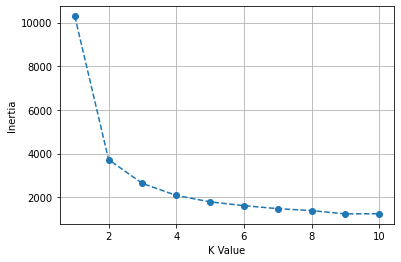

In [47]:
K = [1,2,3,4,5,6,7,8,9,10]
inertia_model_2=[KMeans(n_clusters=i,init='random',n_init=10).fit(df_final).inertia_ for i in K]
plt.plot(K,inertia_model_2,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [48]:
inertia_model_2

[10289.623316239944,
 3718.4968909607596,
 2630.7668215940303,
 2081.0808925119786,
 1785.2497798930463,
 1612.0735385282846,
 1474.201206280031,
 1385.6428499863246,
 1233.4207935837687,
 1242.485242268278]

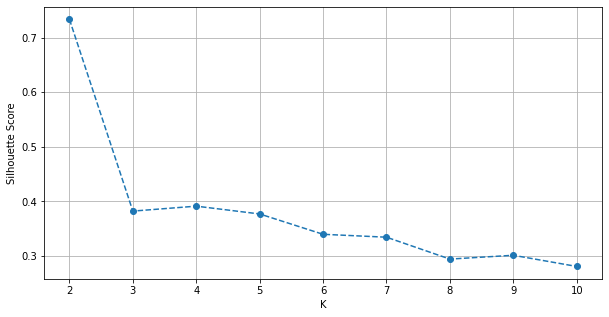

In [49]:
K = [2,3,4,5,6,7,8,9,10]
s_score_slc_model_2=[silhouette_score(df_final, KMeans(n_clusters=i,init='random',n_init=10).fit(df_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc_model_2,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [50]:
s_score_slc_model_2

[0.7334995660819739,
 0.3822391939883008,
 0.391285337367717,
 0.3770058309028739,
 0.33974707090455597,
 0.33441997854371064,
 0.2943396376519621,
 0.3013055909117032,
 0.280851917296099]

> Berdasarkan pada **kmeans model 2**, diketahui bahwa pada grafik pertama terdapat patahan atau elbow di k value 2, 3 dan 4, untuk dapat menentukan nilai k mana yang diambil maka perlu dilihat silhouette score pada grafik ke dua

> Berdasarkan silhouette score, nilai k 2 memiliki silhouette score lebih besar dari pada silhouette score di k 3 dan 4, oleh karna itu pada **kmeans model 2** ditentukan menggunakan nilai k 2 atau n cluster 2 sebagai clustering

### **GMM**

In [51]:
GMM = [GaussianMixture(n_components=k, n_init=2, covariance_type='full', init_params='kmeans', random_state=0).fit(df_final) for k in range(1, 9)]

In [52]:
bics = [model.bic(df_final) for model in GMM]
aics = [model.aic(df_final) for model in GMM]

for k in range(0, 8):
  print('Cluster : ', k+1, '\tBIC : ', bics[k], '\tAIC : ', aics[k])

Cluster :  1 	BIC :  17206.23627636706 	AIC :  16983.445889100458
Cluster :  2 	BIC :  -35314.704736796106 	AIC :  -35766.6509509655
Cluster :  3 	BIC :  -36567.510335383806 	AIC :  -37248.612376455996
Cluster :  4 	BIC :  -52363.9831331575 	AIC :  -53274.24100113248
Cluster :  5 	BIC :  -71730.8898921092 	AIC :  -72870.30358698698
Cluster :  6 	BIC :  -82968.08301390945 	AIC :  -84336.65253569002
Cluster :  7 	BIC :  -87773.34849703679 	AIC :  -89371.07384572015
Cluster :  8 	BIC :  -85440.41296669356 	AIC :  -87267.29414227972


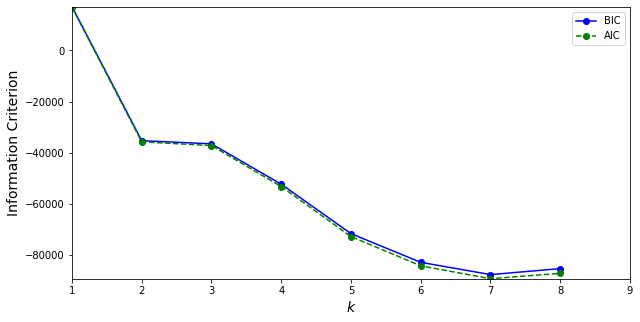

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), bics, "bo-", label="BIC")
plt.plot(range(1, 9), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9, np.min(aics) - 50, np.max(aics) + 50])

plt.legend()
plt.show()

> Berdasarkan pada model GMM, nilai k dapat ditentukan berdasarakan dari score AIC dan BIC, nili k terbaik adalah nilai k yang memiliki AIC terkecil, dan berdasarkan grafik diatas nilai k 7 memiliki nilai AIC terkecil. Jadi pada model GMM ditentukan menggunakan nilai k 7 atau n cluster 7 sebagai clustering

In [54]:
%%time
min_bic = np.infty

for k in range(1, 9):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=2,
                              covariance_type=covariance_type,
                              random_state=0).fit(df_final).bic(df_final)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print('Best - n_components    : ', best_k)
print('Best - covariance_type : ', best_covariance_type)

Best - n_components    :  7
Best - covariance_type :  full
CPU times: user 8.52 s, sys: 5.31 s, total: 13.8 s
Wall time: 8.65 s


In [55]:
GMM_model = GaussianMixture(n_components=7, n_init=2, covariance_type='full', init_params='kmeans', random_state=0).fit(df_final)

In [56]:
GMM_model.weights_

array([0.04267991, 0.08958249, 0.21410077, 0.23371232, 0.18485186,
       0.1978929 , 0.03717975])

In [57]:
GMM_model.means_

array([[ 2.88200271e-01,  3.26857991e-02,  2.74937621e-01,
         1.81596226e-01,  5.97018762e-02,  3.11185644e-02,
         1.02625237e+01],
       [-3.63794326e-01, -1.14392983e-01, -1.39702934e-02,
         6.29111578e-03,  5.93481653e-02, -4.24475026e-02,
         8.82546497e+00],
       [-5.50617935e-01, -1.12145244e-01,  5.26385540e-02,
        -2.40095965e-02, -1.11282902e-01,  2.84944827e-03,
         1.20000000e+01],
       [ 5.45775424e-01,  3.73460664e-02, -6.71641006e-03,
        -6.00633120e-02, -9.10556010e-02, -9.80157007e-03,
         1.20000000e+01],
       [ 1.59762938e-01, -2.91184485e-01, -3.87622504e-02,
         6.75656363e-02,  1.96465588e-02,  3.64317865e-02,
         1.20000000e+01],
       [-1.10744980e-01,  3.38330795e-01, -3.48515718e-02,
        -4.05817113e-02,  1.62842769e-01, -2.81086675e-03,
         1.20000000e+01],
       [ 8.08422264e-02,  2.96060558e-01, -1.64630282e-01,
         1.72274520e-01,  3.72464118e-02, -5.44150702e-02,
         8.9903097

In [58]:
GMM_model.covariances_

array([[[ 2.75293406e-01,  4.33337182e-03,  3.26986934e-02,
         -3.02980939e-02, -4.73526728e-03,  2.09424208e-02,
          2.82067395e-01],
        [ 4.33337182e-03,  1.16275458e-01,  2.29003913e-02,
          4.24198351e-03, -1.49175655e-02, -8.35305632e-03,
         -1.01083960e-01],
        [ 3.26986934e-02,  2.29003913e-02,  1.37466480e-01,
         -4.55568470e-03, -6.15250643e-03, -5.99011442e-03,
          9.36145671e-02],
        [-3.02980939e-02,  4.24198351e-03, -4.55568470e-03,
          8.80135621e-02,  5.64859511e-06,  1.78211801e-03,
         -2.57116040e-02],
        [-4.73526728e-03, -1.49175655e-02, -6.15250643e-03,
          5.64859511e-06,  2.14527117e-02,  2.03401945e-03,
          2.73966333e-02],
        [ 2.09424208e-02, -8.35305632e-03, -5.99011442e-03,
          1.78211801e-03,  2.03401945e-03,  5.44683279e-02,
          9.15583161e-02],
        [ 2.82067395e-01, -1.01083960e-01,  9.36145671e-02,
         -2.57116040e-02,  2.73966333e-02,  9.15583161e-02

In [59]:
GMM_model.converged_ 

True

In [60]:
GMM_model.n_iter_

59

### **BGM**

In [61]:
BGM = BayesianGaussianMixture(n_components=7, n_init=2, covariance_type='full', init_params='kmeans', random_state=0).fit(df_final)

In [62]:
print('Weight - Full Value             : \n', BGM.weights_)
print('')
print('Weight - Round to Two Digits    : \n', np.round(BGM.weights_, 2))
print('')
print('Weight - Gaussian Mixture Model : \n', GMM_model.weights_)

Weight - Full Value             : 
 [0.10972324 0.09298232 0.19273901 0.15995579 0.23060711 0.14930148
 0.06469107]

Weight - Round to Two Digits    : 
 [0.11 0.09 0.19 0.16 0.23 0.15 0.06]

Weight - Gaussian Mixture Model : 
 [0.04267991 0.08958249 0.21410077 0.23371232 0.18485186 0.1978929
 0.03717975]


> Model BGM sama seperti model GMM hanya saja pada model BGM untuk menentukan nilai k, dilihat berdasarkan score BIC. Dikarnakan GMM menentapkan 7 cluster, maka berdasarkan perhitungan diatas dari nilai weight model BGM juga ditentukan menggunakan nilai k 7 atau n cluster 7 sebagai clustering

## **7.2. Model Evaluation**

> Setelah menentukan nilai k yang digunakan pada setiap model clustering, selanjut dilakukan clustering pada dataset

### **KMeans Model 1**

In [63]:
KM_1 = KMeans(n_clusters=2,init='k-means++',n_init=15).fit(df_final)
KM_1.fit_predict(df_final)
df_final['KMeans1'] = KM_1.labels_
df_final

,0,1,2,3,4,5,TENURE,KMeans1
0,-0.495,0.131,0.051,-0.283,-0.089,0.009,8,1
1,-0.485,0.088,0.056,-0.276,-0.202,-0.006,8,1
2,-0.485,0.081,0.058,-0.274,-0.202,0.020,8,1
3,-0.488,0.070,0.056,-0.270,-0.204,0.044,8,1
4,-0.528,0.328,0.040,-0.318,0.368,0.020,8,1
...,...,...,...,...,...,...,...,...
4291,-0.756,-0.250,-0.069,0.405,-0.027,-0.085,11,0
4292,-0.763,-0.219,-0.069,0.411,0.063,-0.056,11,0
4293,0.298,-0.684,0.426,0.319,0.229,-0.237,11,0
4294,-0.348,-0.473,0.354,0.401,0.088,-0.073,11,0


In [64]:
df_KM1_label = df_final['KMeans1']
df_KM1_label

0       1
1       1
2       1
3       1
4       1
       ..
4291    0
4292    0
4293    0
4294    0
4295    0
Name: KMeans1, Length: 4296, dtype: int32

> Code diatas merupakan hasil clustering terhadap dataset dengan menggunakan **kmeans model 1**

In [65]:
df_final_KM1 = pd.concat([X2D,df_KM1_label],axis=1)
df_final_KM1

,0,1,KMeans1
0,-0.495,0.131,1
1,-0.485,0.088,1
2,-0.485,0.081,1
3,-0.488,0.070,1
4,-0.528,0.328,1
...,...,...,...
4291,-0.756,-0.250,0
4292,-0.763,-0.219,0
4293,0.298,-0.684,0
4294,-0.348,-0.473,0


> Dataframe diatas merupakan dataframen yang terdiri dan 2 dimensi pada data train dan digabungkan dengan hasil clustering pada **kmeans model 1** yang selanjutnya akan divisualisasikan menggunkan scatterplot untuk melihat penyebaran clusternya

### **KMeans Model 2**

In [66]:
KM_2 = KMeans(n_clusters=2,init='random',n_init=10).fit(df_final)
KM_2.fit_predict(df_final)
df_final['KMeans2'] = KM_2.labels_
df_final

,0,1,2,3,4,5,TENURE,KMeans1,KMeans2
0,-0.495,0.131,0.051,-0.283,-0.089,0.009,8,1,0
1,-0.485,0.088,0.056,-0.276,-0.202,-0.006,8,1,0
2,-0.485,0.081,0.058,-0.274,-0.202,0.020,8,1,0
3,-0.488,0.070,0.056,-0.270,-0.204,0.044,8,1,0
4,-0.528,0.328,0.040,-0.318,0.368,0.020,8,1,0
...,...,...,...,...,...,...,...,...,...
4291,-0.756,-0.250,-0.069,0.405,-0.027,-0.085,11,0,1
4292,-0.763,-0.219,-0.069,0.411,0.063,-0.056,11,0,1
4293,0.298,-0.684,0.426,0.319,0.229,-0.237,11,0,1
4294,-0.348,-0.473,0.354,0.401,0.088,-0.073,11,0,1


In [67]:
df_KM2_label = df_final['KMeans2']
df_KM2_label

0       0
1       0
2       0
3       0
4       0
       ..
4291    1
4292    1
4293    1
4294    1
4295    1
Name: KMeans2, Length: 4296, dtype: int32

> Code diatas merupakan hasil clustering terhadap dataset dengan menggunakan **kmeans model 2**

In [68]:
df_final_KM2 = pd.concat([X2D,df_KM2_label],axis=1)
df_final_KM2

,0,1,KMeans2
0,-0.495,0.131,0
1,-0.485,0.088,0
2,-0.485,0.081,0
3,-0.488,0.070,0
4,-0.528,0.328,0
...,...,...,...
4291,-0.756,-0.250,1
4292,-0.763,-0.219,1
4293,0.298,-0.684,1
4294,-0.348,-0.473,1


> Dataframe diatas merupakan dataframen yang terdiri dan 2 dimensi pada data train dan digabungkan dengan hasil clustering pada **kmeans model 2** yang selanjutnya akan divisualisasikan menggunkan scatterplot untuk melihat penyebaran clusternya

In [94]:
KM_1.labels_ is KM_2.labels_

False

> Code diatas merupakan code untuk melihat apakah pada kmeans model 1 dan kmeans model 2 sama atau tidak, dan berdasarkan hasil diatas antara kmeans model 1 dan kmeans model 2 tidak sama

### **GMM**

In [70]:
GMM_model = GaussianMixture(n_components=7, n_init=2, covariance_type='full', init_params='kmeans', random_state=0).fit(df_final)
df_final['GMM'] = GMM_model.fit_predict(df_final)
df_final

,0,1,2,3,4,5,TENURE,KMeans1,KMeans2,GMM
0,-0.495,0.131,0.051,-0.283,-0.089,0.009,8,1,0,1
1,-0.485,0.088,0.056,-0.276,-0.202,-0.006,8,1,0,1
2,-0.485,0.081,0.058,-0.274,-0.202,0.020,8,1,0,1
3,-0.488,0.070,0.056,-0.270,-0.204,0.044,8,1,0,1
4,-0.528,0.328,0.040,-0.318,0.368,0.020,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4291,-0.756,-0.250,-0.069,0.405,-0.027,-0.085,11,0,1,0
4292,-0.763,-0.219,-0.069,0.411,0.063,-0.056,11,0,1,0
4293,0.298,-0.684,0.426,0.319,0.229,-0.237,11,0,1,0
4294,-0.348,-0.473,0.354,0.401,0.088,-0.073,11,0,1,0


In [71]:
df_GMM_label = df_final['GMM']
df_GMM_label

0       1
1       1
2       1
3       1
4       1
       ..
4291    0
4292    0
4293    0
4294    0
4295    0
Name: GMM, Length: 4296, dtype: int64

> Code diatas merupakan hasil clustering terhadap dataset dengan menggunakan **model GMM**

In [72]:
df_final_GMM = pd.concat([X2D,df_GMM_label],axis=1)
df_final_GMM

,0,1,GMM
0,-0.495,0.131,1
1,-0.485,0.088,1
2,-0.485,0.081,1
3,-0.488,0.070,1
4,-0.528,0.328,1
...,...,...,...
4291,-0.756,-0.250,0
4292,-0.763,-0.219,0
4293,0.298,-0.684,0
4294,-0.348,-0.473,0


> Dataframe diatas merupakan dataframen yang terdiri dan 2 dimensi pada data train dan digabungkan dengan hasil clustering pada **model GMM** yang selanjutnya akan divisualisasikan menggunkan scatterplot untuk melihat penyebaran clusternya

### **BGM**

In [73]:
BGM_model = BayesianGaussianMixture(n_components=7, n_init=2, covariance_type='full', init_params='kmeans', random_state=0).fit(df_final)
df_final['BGM'] = BGM_model.fit_predict(df_final)
df_final

,0,1,2,3,4,5,TENURE,KMeans1,KMeans2,GMM,BGM
0,-0.495,0.131,0.051,-0.283,-0.089,0.009,8,1,0,1,3
1,-0.485,0.088,0.056,-0.276,-0.202,-0.006,8,1,0,1,3
2,-0.485,0.081,0.058,-0.274,-0.202,0.020,8,1,0,1,3
3,-0.488,0.070,0.056,-0.270,-0.204,0.044,8,1,0,1,3
4,-0.528,0.328,0.040,-0.318,0.368,0.020,8,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
4291,-0.756,-0.250,-0.069,0.405,-0.027,-0.085,11,0,1,0,0
4292,-0.763,-0.219,-0.069,0.411,0.063,-0.056,11,0,1,0,0
4293,0.298,-0.684,0.426,0.319,0.229,-0.237,11,0,1,0,0
4294,-0.348,-0.473,0.354,0.401,0.088,-0.073,11,0,1,0,0


In [74]:
df_BGM_label = df_final['BGM']
df_BGM_label

0       3
1       3
2       3
3       3
4       3
       ..
4291    0
4292    0
4293    0
4294    0
4295    0
Name: BGM, Length: 4296, dtype: int64

> Code diatas merupakan hasil clustering terhadap dataset dengan menggunakan **model BGM**

In [75]:
df_final_BGM = pd.concat([X2D,df_BGM_label],axis=1)
df_final_BGM

,0,1,BGM
0,-0.495,0.131,3
1,-0.485,0.088,3
2,-0.485,0.081,3
3,-0.488,0.070,3
4,-0.528,0.328,3
...,...,...,...
4291,-0.756,-0.250,0
4292,-0.763,-0.219,0
4293,0.298,-0.684,0
4294,-0.348,-0.473,0


> Dataframe diatas merupakan dataframen yang terdiri dan 2 dimensi pada data train dan digabungkan dengan hasil clustering pada **model BGM** yang selanjutnya akan divisualisasikan menggunkan scatterplot untuk melihat penyebaran clusternya

### **Perbandingan Model**

Text(0.5, 1.0, 'KMeans model 1')

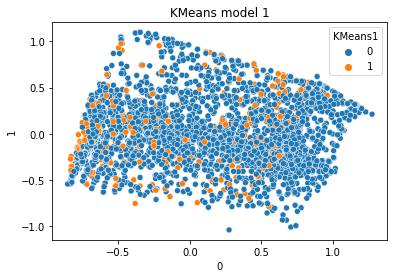

In [95]:
sns.scatterplot(x=df_final_KM1.iloc[:,0],y=df_final_KM1.iloc[:,1],hue=df_final_KM1.KMeans1, palette= "tab10")
plt.title('KMeans model 1')

Text(0.5, 1.0, 'KMeans model 2')

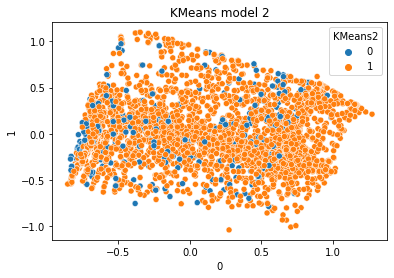

In [96]:
sns.scatterplot(x=df_final_KM2.iloc[:,0],y=df_final_KM2.iloc[:,1],hue=df_final_KM2.KMeans2, palette= "tab10")
plt.title('KMeans model 2')

Text(0.5, 1.0, 'GMM')

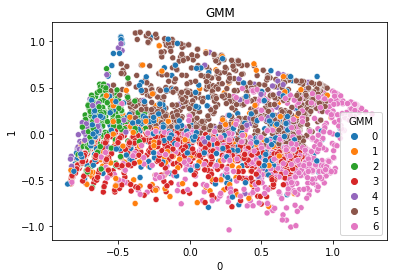

In [97]:
sns.scatterplot(x=df_final_GMM.iloc[:,0],y=df_final_GMM.iloc[:,1],hue=df_final_GMM.GMM, palette= "tab10")
plt.title('GMM')

Text(0.5, 1.0, 'BGM')

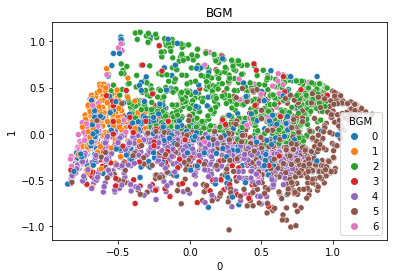

In [98]:
sns.scatterplot(x=df_final_BGM.iloc[:,0],y=df_final_BGM.iloc[:,1],hue=df_final_BGM.BGM, palette= "tab10")
plt.title('BGM')

> Berdasarkan visualisasi menggunakan scatterplot pada setiap model yang digunakan dengan menggunakan 2 dimensi dari data train, setiap model memiliki scatterplot yang saling tumpang tindih yang berartikan data blom terkelompokan secara bagus atau blom ada garis pemisah disetiap clusternya, hal ini bisa saja dikarnakan model yang digunakan kurang tepat atau terjadi kesalahan pada proses data preprocessing

> Akan tetapi untuk tahapan selanjutnya saya menggunakan kmeans model 1 untuk ke tahap selanjutnya

### **EDA KMeans Model 1**

In [80]:
df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,943.584,0.875,103.000,103.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,215.325,410.485,0.000,8
1,461.456,1.000,585.000,585.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,258.033,151.696,0.000,8
2,1053.595,1.000,1450.000,1450.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,397.091,227.143,0.000,8
3,2237.238,1.000,120.000,120.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,2500.000,343.103,712.986,0.000,8
4,424.994,0.375,1200.000,1200.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1200.000,57.266,56.720,0.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1079.008,1.000,0.000,0.000,0.000,1259.572,0.000,0.000,0.000,0.545,9,0,1200.000,1379.635,271.364,0.091,11
4292,809.583,0.909,0.000,0.000,0.000,3819.672,0.000,0.000,0.000,0.545,7,0,4150.000,4372.149,241.645,0.091,11
4293,3386.491,1.000,560.980,427.220,133.760,2008.154,1.000,0.727,0.364,0.545,9,20,10100.000,1039.000,886.050,0.000,11
4294,4840.546,1.000,1595.930,1595.930,0.000,4359.326,0.455,0.455,0.000,0.545,17,25,6000.000,905.845,2376.920,0.091,11


In [81]:
df_clean['Cluster'] = KM_1.labels_

In [82]:
df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,943.584,0.875,103.000,103.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,215.325,410.485,0.000,8,1
1,461.456,1.000,585.000,585.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1000.000,258.033,151.696,0.000,8,1
2,1053.595,1.000,1450.000,1450.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1500.000,397.091,227.143,0.000,8,1
3,2237.238,1.000,120.000,120.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,2500.000,343.103,712.986,0.000,8,1
4,424.994,0.375,1200.000,1200.000,0.000,0.000,0.125,0.125,0.000,0.000,0,1,1200.000,57.266,56.720,0.000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1079.008,1.000,0.000,0.000,0.000,1259.572,0.000,0.000,0.000,0.545,9,0,1200.000,1379.635,271.364,0.091,11,0
4292,809.583,0.909,0.000,0.000,0.000,3819.672,0.000,0.000,0.000,0.545,7,0,4150.000,4372.149,241.645,0.091,11,0
4293,3386.491,1.000,560.980,427.220,133.760,2008.154,1.000,0.727,0.364,0.545,9,20,10100.000,1039.000,886.050,0.000,11,0
4294,4840.546,1.000,1595.930,1595.930,0.000,4359.326,0.455,0.455,0.000,0.545,17,25,6000.000,905.845,2376.920,0.091,11,0


In [83]:
a = pd.DataFrame(df_clean['Cluster'])
a.value_counts()/len(a) *100

Cluster
0         91.620
1          8.380
dtype: float64

> Berdasarkan hasil clustering menggunakan kmeans model 1, pada cluster 0 memiliki persentase paling banyak dibandingkan cluster 1, yaitu sebanyak 91.620% sementara cluster 1 hanya 8.380%

In [84]:
a.value_counts()

Cluster
0          3936
1           360
dtype: int64

> Output diatas merupakan jumlah data dimasing - masing cluster, dimana cluster 0 memiliki jumlah data sebanyak 3936 data atau pelanggan sedangkan cluster 1 sebanyak 360 data atau pelanggan

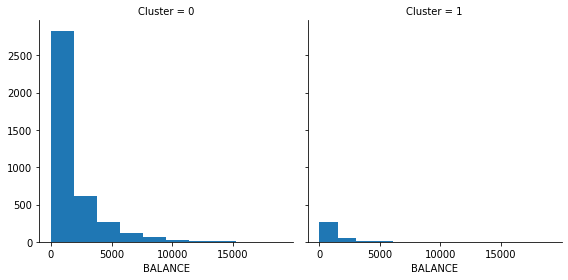

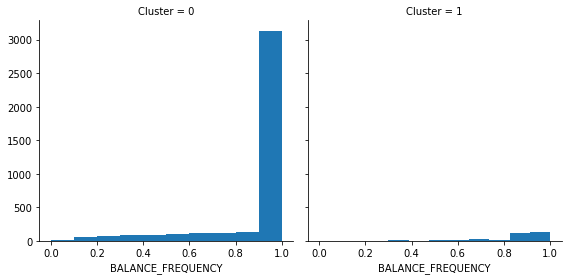

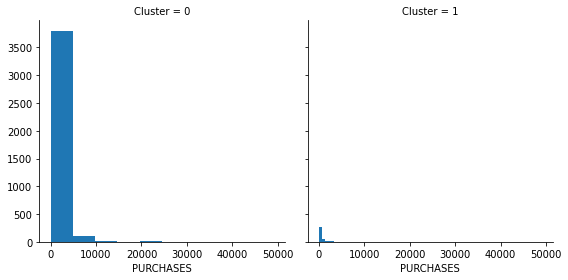

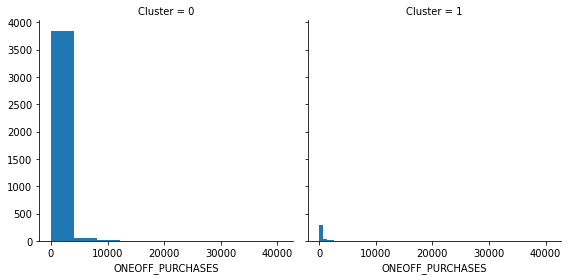

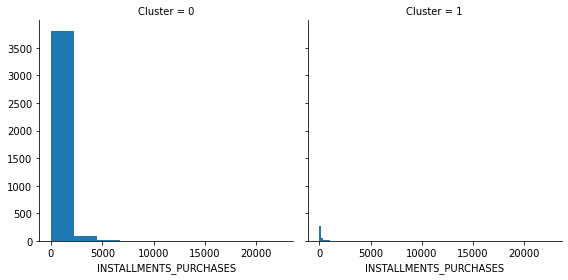

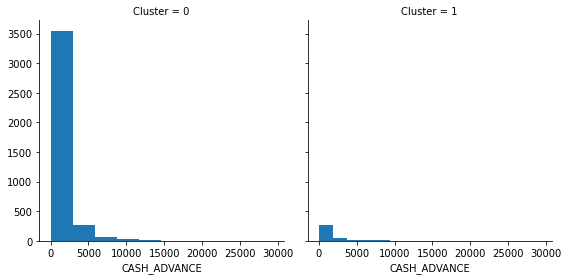

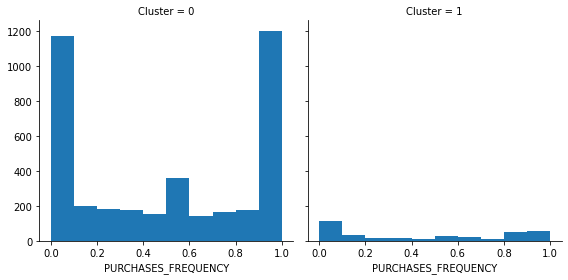

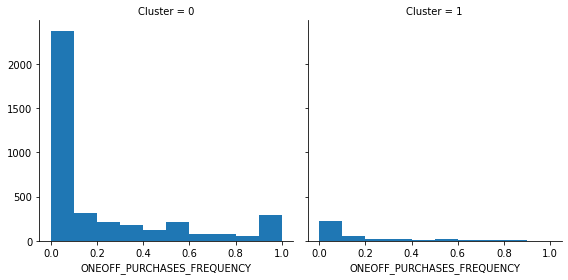

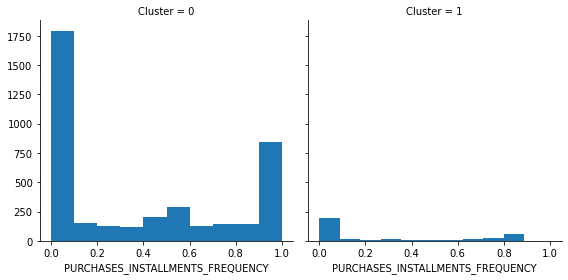

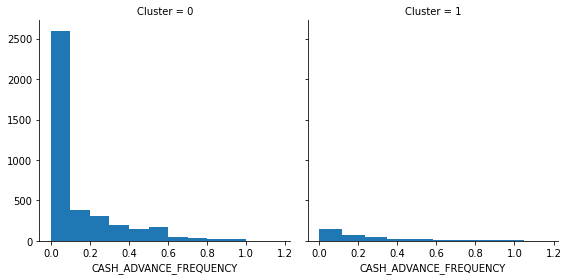

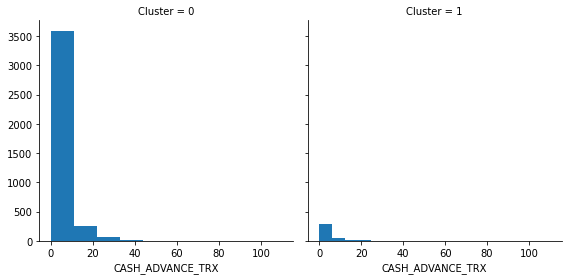

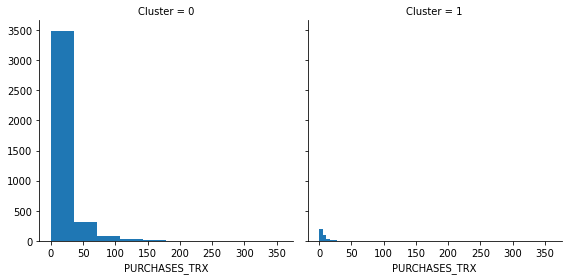

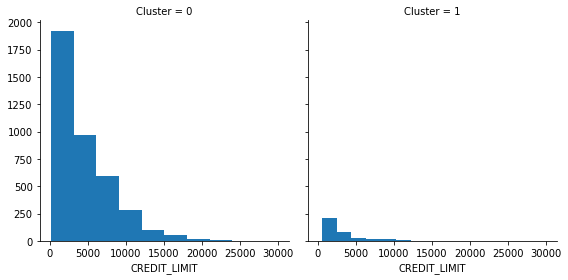

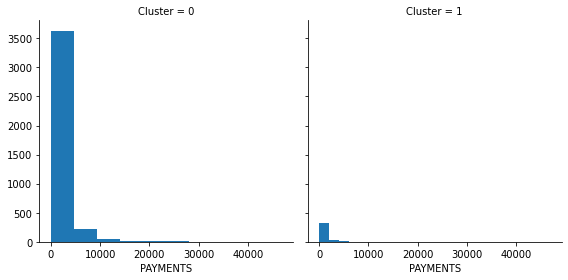

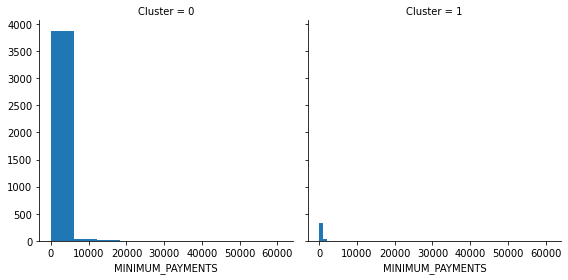

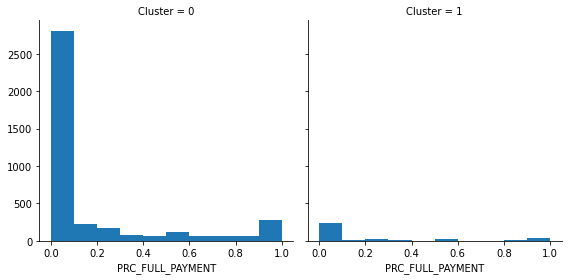

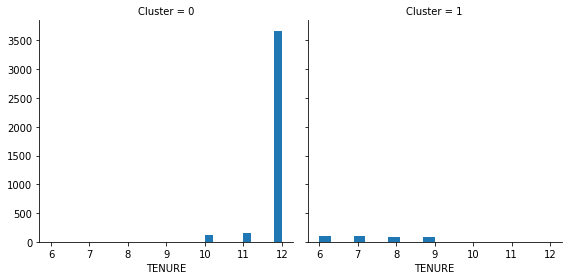

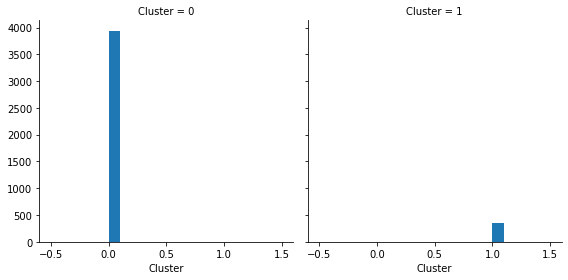

In [85]:
for c in df_clean:
    grid= sns.FacetGrid(df_clean, col='Cluster', height=4)
    grid.map(plt.hist, c)

> Grafik diatas merupakan grafik disetiap kolom pada cluster 0 dan cluster 1

In [99]:
data_0 = df_clean[df_clean['Cluster']==0]
data_1 = df_clean[df_clean['Cluster']==1]

In [115]:
Cluster_0 = data_0.mean().reset_index()
Cluster_0 = Cluster_0.rename(columns = {'index': 'Kolom', 0: 'Cluster_0'})

In [116]:
Cluster_1 = data_1.mean().reset_index()
Cluster_1 = Cluster_1.rename(columns = {0: 'Cluster_1'})
Cluster_1 = Cluster_1.drop(columns='index')

In [117]:
df_cluster = pd.concat([Cluster_0,Cluster_1],axis=1)
df_cluster

,Kolom,Cluster_0,Cluster_1
0,BALANCE,1640.252,1144.041
1,BALANCE_FREQUENCY,0.901,0.832
2,PURCHASES,1074.915,481.589
3,ONEOFF_PURCHASES,628.179,315.868
4,INSTALLMENTS_PURCHASES,447.158,165.721
5,CASH_ADVANCE,937.660,1486.855
6,PURCHASES_FREQUENCY,0.501,0.436
7,ONEOFF_PURCHASES_FREQUENCY,0.211,0.147
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.378,0.283
9,CASH_ADVANCE_FREQUENCY,0.127,0.227


Tabel diatas merupakan tabel rata - rata pada setiap kolom di masing - masing cluster, dari tabel diatas dapat diinterpretasikan sebagai berikut:

- pada kolom `BALANCE` dicluster 0 memiliki rata - rata sebesar 1640.252 sedangkan pada cluster 1 memiliki rata - rata 1144.041, yang berarti cluster 0 memiliki mean lebih tinggi dibandingkan cluster 1, sehingga dapat disimpulkan bahawa pada cluster 0 memiliki rata - rata `BALANCE` sebesar 1640.252

- pada kolom `BALANCE_FREQUENCY` di cluster 0 memiliki rata - rata `BALANCE_FREQUENCY` lebih besar daripada cluster 1, yang berarti pada cluster 0, pengguna kartu kredit sering memperbarui saldonya

- Pada kolom `PURCHASES` di cluster 0 memiliki rata - rata `PURCHASES` lebih besar daripada cluster 1 yaitu sebesar 1074.915 sedangkan di cluster 1 sebesar 481.589, yang berarti pada cluster 0 Jumlah pembelian yang dilakukan oleh pengguna memiliki rata - rata sebesar 1074.915 sedangkan di cluster 1 sebesar 481.589

- Pada kolom `CREDIT_LIMIT` di cluster 0 memiliki rata - rata `CREDIT_LIMIT` lebih besar daripada cluster 1 yaitu sebesar 4664.133 sedangkan di cluster 1 sebesar 2954.500, yang berarti pada cluster 0 Batas Kartu Kredit untuk pengguna memiliki rata - rata sebesar 4664.133 sedangkan di cluster 1 sebesar 2954.500

- Pada kolom `PAYMENTS` di cluster 0 memiliki rata - rata `PAYMENTS` lebih besar daripada cluster 1 yaitu sebesar 1854.933 sedangkan di cluster 1 sebesar 951.777, yang berarti pada cluster 0 Batas Kartu Kredit untuk pengguna memiliki rata - rata sebesar 1854.933 sedangkan di cluster 1 sebesar 951.777

- Pada kolom `TENURE` dicluster 0 rata - rata Jangka waktu layanan kartu kredit untuk pengguna adalah 12 bulan sedangkan pada cluster 1 rata - rata Jangka waktu layanan kartu kredit untuk pengguna adalah 7 bulan

- Dan berdasarkan uraian diatas dapat disimpulkan bahwa cluster 0 dapat diartikan sebagi pengguna kartu kredit aktif dan cluster 1 dapat diartikan sebagai pengguna pasif

# **8. Model Inference**

In [86]:
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1186.928,1.000,2178.000,1546.500,631.500,0.000,1.000,1.000,0.333,0.000,0,28,7000.000,2565.252,300.082,0.000,12
1,360.671,1.000,3956.640,0.000,3956.640,148.682,1.000,0.000,1.000,0.083,1,12,4500.000,4013.483,3662.236,0.250,12
2,3342.878,0.818,1368.700,1300.000,68.700,1594.328,0.083,0.083,0.083,0.083,2,2,7500.000,9614.698,1309.067,0.111,12
3,2342.724,0.909,0.000,0.000,0.000,4697.170,0.000,0.000,0.000,0.333,7,0,8000.000,6049.990,517.091,0.091,12
4,2910.425,1.000,0.000,0.000,0.000,2121.505,0.000,0.000,0.000,0.333,6,0,7500.000,3855.512,749.956,0.000,12
5,1360.796,1.000,0.000,0.000,0.000,462.861,0.000,0.000,0.000,0.273,6,0,1500.000,303.032,443.781,0.000,11
6,916.488,1.000,633.710,316.820,316.890,0.000,1.000,0.417,0.750,0.000,0,20,4000.000,255.470,234.096,0.000,12
7,4705.295,1.000,0.000,0.000,0.000,9894.067,0.000,0.000,0.000,0.917,30,0,9000.000,8778.878,1470.362,0.000,12
8,4939.646,1.000,470.540,139.380,331.160,8753.243,0.750,0.333,0.583,0.917,39,14,10000.000,11721.866,1183.292,0.083,12
9,33.586,1.000,298.200,0.000,298.200,0.000,1.000,0.000,1.000,0.000,0,12,4000.000,299.549,171.520,1.000,12


In [87]:
df_num_inf =df_inf.drop(columns=['TENURE'])
df_cat_inf =df_inf[['TENURE']]

In [88]:
df_num_inf_scaled = num_scaler.transform(df_num_inf)

In [89]:
pca = PCA(n_components=6)
df_num_inf_reduced = pca.fit_transform(df_num_inf_scaled)

In [90]:
df_num_inf_reduced = pd.DataFrame(df_num_inf_reduced)
df_num_inf_reduced

,0,1,2,3,4,5
0,-1710.000,0.732,0.235,-0.650,-0.259,-0.139
1,790.000,0.729,-0.246,0.267,0.328,0.174
2,-2210.000,-0.327,0.524,0.016,0.146,-0.028
3,-2710.000,-0.595,0.262,0.061,0.113,-0.080
4,-2210.000,-0.608,0.206,-0.033,0.184,-0.109
5,3790.000,-0.672,-0.096,-0.142,0.014,-0.027
6,1290.000,0.715,-0.107,-0.251,0.118,0.115
7,-3710.000,-0.965,-0.492,0.051,-0.063,-0.047
8,-4710.000,-0.038,-0.825,0.027,-0.156,0.080
9,1290.000,0.895,-0.079,0.801,-0.028,-0.140


In [91]:
df_inf_final = pd.concat([df_num_inf_reduced,df_cat_inf],axis=1)
df_inf_final

,0,1,2,3,4,5,TENURE
0,-1710.000,0.732,0.235,-0.650,-0.259,-0.139,12
1,790.000,0.729,-0.246,0.267,0.328,0.174,12
2,-2210.000,-0.327,0.524,0.016,0.146,-0.028,12
3,-2710.000,-0.595,0.262,0.061,0.113,-0.080,12
4,-2210.000,-0.608,0.206,-0.033,0.184,-0.109,12
5,3790.000,-0.672,-0.096,-0.142,0.014,-0.027,11
6,1290.000,0.715,-0.107,-0.251,0.118,0.115,12
7,-3710.000,-0.965,-0.492,0.051,-0.063,-0.047,12
8,-4710.000,-0.038,-0.825,0.027,-0.156,0.080,12
9,1290.000,0.895,-0.079,0.801,-0.028,-0.140,12


In [92]:
KM_1.predict(df_inf_final)

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int32)

> Pada tahapan model inference, model yang saya gunakan pada tahapan ini adalah kmeans model 1, dan ketika dimasukan data baru model dapat berjalan dan melakukan prediksi yang berarti model dapat digunakan dan dapat berjalan dalam melakukan prediksi terhadap data baru

# **9. Questions & Conclusions** 

## **9.1. Questions** 

**1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?**

> inertia adalah jumlah kuadrat jarak sampel ke pusat cluster terdekat. Inersia dataset diukur dengan seberapa baik clustered menggunakan K-Means. Ini dihitung dengan menghitung jarak antara setiap titik data dan centroidnya, mengkuadratkan jarak itu, dan menjumlahkan kuadrat di satu cluster. Karena jumlah cluster meningkat, inersia diharapkan menurun tetapi tidak dijamin karena algoritma k-means membutuhkan inisialisasi acak dan mungkin ada minima lokal. Untuk mencari K yang optimal untuk suatu dataset, salah satu metode yang paling umum adalah dengan menggunakan metode Elbow; temukan titik di mana penurunan inersia mulai melambat

**2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !**

> Elbow method adalah heuristik yang digunakan untuk menghitung jumlah cluster dalam suatu kumpulan data. Metode ini mencakup memplot variasi yang dijelaskan sebagai fungsi jumlah klaster dan memilih siku kurva sebagai jumlah klaster yang akan digunakan. Metode yang sama dapat diterapkan untuk menentukan jumlah parameter dalam model berbasis data lainnya, seperti jumlah komponen utama yang digunakan untuk mendeskripsikan kumpulan data. Kita dapat menggunakan metode Elbow untuk mendapatkan indikasi cluster untuk data kita. Ini terdiri dari interpretasi plot garis dengan bentuk siku. Jumlah cluster adalah tikungan siku. Sumbu x plot adalah jumlah cluster dan sumbu y adalah Jumlah Kuadrat Dalam Cluster (WCSS) untuk setiap jumlah cluster.

**3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !**

> Kmeans bekerja dengan menempatkan k jumlah centroid dalam distribusi data dan clustering berdasarkan jarak titik data dari centroid tersebut dengan cluster berbentuk melingkar, sedangkan Gaussian Mixture bekerja mirip dengan KMeans tetapi mengasumsikan bahwa distribusi data adalah gaussian dan menciptakan kluster bola bola atau bola terentang. Dan Bayesian Gaussian Mixture sama seperti Gaussian Mixture hanya saja pada BGM untuk menentukan jumlah cluster dilihat dari nilai BIC nya

## **9.2. Conclusions** 

Dari overall analysis dapat disimpulkan bahwa:

1. Pada analisis diatas data yang digunakan terdiri dari 4475 entri data atau baris dan 18 kolom

2. Pada analisis ini dilakukan capping outlier pada data numerik yang memiliki outlier dibawah 1% yaitu kolom CASH_ADVANCE_FREQUENCY dan kolom CREDIT_LIMIT

3. Pada proses reduksi dimensi pada kolom numerik, diperoleh 6 pc yang mana informasi yang diambil pada data numerik yaitu sebesar 95% dan digabung dengan kolom kategorik yang sudah diencoding

4. Pada tahap model definition, model yang digunakan adalah sebagai berikut:

> - KMeans 
> - Gaussian Mixture
> - Bayesian Gaussian Mixture

> Dari model - model ini akan ditentukan nilai k terbaik dari setiap model, dan dibandingkan dari masing - masing model untuk digunakan di tahap model inference

5. Dari model - model yang ditetapkan, berdasarkan visualisasi scatterplot masing - masing model tidak dapat memisahkan antar cluster, sehingga dapat disimpulkan model - model yang ditentukan kurang baik dalam clustering


6. Dan berdasarkan analisis ditetapkan kmeans model 1 dengan nilai k sama dengan 2 sebagai model yang dilanjutkan ketahap selanjutnya

7. Dan berdasarkan EDA dari hasil clustering kmeans model 1 dapat diinterpretasikan sebagai berikut:

> - Dari hasil analisis clustering dengan kmeans dimana cluster 0 memiliki jumlah data sebanyak 3936 data atau pelanggan sedangkan cluster 1 sebanyak 360 data atau pelanggan

> - pada kolom `BALANCE` dicluster 0 memiliki rata - rata sebesar 1640.252 sedangkan pada cluster 1 memiliki rata - rata 1144.041, yang berarti cluster 0 memiliki mean lebih tinggi dibandingkan cluster 1, sehingga dapat disimpulkan bahawa pada cluster 0 memiliki rata - rata `BALANCE` sebesar 1640.252

> - pada kolom `BALANCE_FREQUENCY` di cluster 0 memiliki rata - rata `BALANCE_FREQUENCY` lebih besar daripada cluster 1, yang berarti pada cluster 0, pengguna kartu kredit sering memperbarui saldonya

> - Pada kolom `PURCHASES` di cluster 0 memiliki rata - rata `PURCHASES` lebih besar daripada cluster 1 yaitu sebesar 1074.915 sedangkan di cluster 1 sebesar 481.589, yang berarti pada cluster 0 Jumlah pembelian yang dilakukan oleh pengguna memiliki rata - rata sebesar 1074.915 sedangkan di cluster 1 sebesar 481.589

> - Pada kolom `CREDIT_LIMIT` di cluster 0 memiliki rata - rata `CREDIT_LIMIT` lebih besar daripada cluster 1 yaitu sebesar 4664.133 sedangkan di cluster 1 sebesar 2954.500, yang berarti pada cluster 0 Batas Kartu Kredit untuk pengguna memiliki rata - rata sebesar 4664.133 sedangkan di cluster 1 sebesar 2954.500

> - Pada kolom `PAYMENTS` di cluster 0 memiliki rata - rata `PAYMENTS` lebih besar daripada cluster 1 yaitu sebesar 1854.933 sedangkan di cluster 1 sebesar 951.777, yang berarti pada cluster 0 Batas Kartu Kredit untuk pengguna memiliki rata - rata sebesar 1854.933 sedangkan di cluster 1 sebesar 951.777

> - Pada kolom `TENURE` dicluster 0 rata - rata Jangka waktu layanan kartu kredit untuk pengguna adalah 12 bulan sedangkan pada cluster 1 rata - rata Jangka waktu layanan kartu kredit untuk pengguna adalah 7 bulan

8. Dan berdasarkan uraian diatas dapat disimpulkan bahwa cluster 0 dapat diartikan sebagi pengguna kartu kredit aktif dan cluster 1 dapat diartikan sebagai pengguna pasif
